<a href="https://colab.research.google.com/github/abdelrahim-hentabli/CS235Project/blob/main/FourierTransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# import the scatter_matrix functionality
import random as rand
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# 1. Data Analysis

In [2]:
apple = pd.read_csv('./Data/Stocks/aapl.us.txt')
print(apple)

            Date       Open       High        Low      Close    Volume  \
0     1984-09-07    0.42388    0.42902    0.41874    0.42388  23220030   
1     1984-09-10    0.42388    0.42516    0.41366    0.42134  18022532   
2     1984-09-11    0.42516    0.43668    0.42516    0.42902  42498199   
3     1984-09-12    0.42902    0.43157    0.41618    0.41618  37125801   
4     1984-09-13    0.43927    0.44052    0.43927    0.43927  57822062   
...          ...        ...        ...        ...        ...       ...   
8359  2017-11-06  171.75000  174.36000  171.10000  173.63000  34901241   
8360  2017-11-07  173.29000  174.51000  173.29000  174.18000  24424877   
8361  2017-11-08  174.03000  175.61000  173.71000  175.61000  24451166   
8362  2017-11-09  174.48000  175.46000  172.52000  175.25000  29533086   
8363  2017-11-10  175.11000  175.38000  174.27000  174.67000  25130494   

      OpenInt  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  

## Clean Up
Adding Return percentage per day for apple stock prices

In [3]:
percent = (apple.Open - apple.Close) / (apple.Open) * 100
apple['Return'] = percent
print(apple)

            Date       Open       High        Low      Close    Volume  \
0     1984-09-07    0.42388    0.42902    0.41874    0.42388  23220030   
1     1984-09-10    0.42388    0.42516    0.41366    0.42134  18022532   
2     1984-09-11    0.42516    0.43668    0.42516    0.42902  42498199   
3     1984-09-12    0.42902    0.43157    0.41618    0.41618  37125801   
4     1984-09-13    0.43927    0.44052    0.43927    0.43927  57822062   
...          ...        ...        ...        ...        ...       ...   
8359  2017-11-06  171.75000  174.36000  171.10000  173.63000  34901241   
8360  2017-11-07  173.29000  174.51000  173.29000  174.18000  24424877   
8361  2017-11-08  174.03000  175.61000  173.71000  175.61000  24451166   
8362  2017-11-09  174.48000  175.46000  172.52000  175.25000  29533086   
8363  2017-11-10  175.11000  175.38000  174.27000  174.67000  25130494   

      OpenInt    Return  
0           0  0.000000  
1           0  0.599226  
2           0 -0.907893  
3      

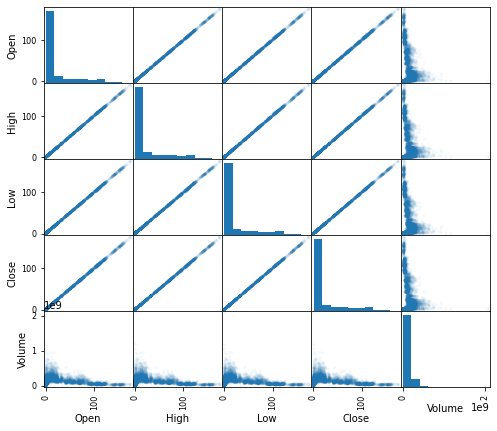

In [4]:
x = apple.iloc[:,[1,2,3,4,5]] # extract only a subset of columns from dataframe (using index)
y = x.dropna(thresh=5) # drop any rows that have 5 or more fields as NAN  
a = pd.plotting.scatter_matrix(x, alpha=0.05, figsize=(8,7), diagonal='hist')
plt.show()

# 2. Pre-Processing 

## Fourier Analysis
Analyzing data for Fourier Transform, looking at Apple stock closing price per day over time and daily return percentage over time.

(array([1.92233768e-06, 1.02065803e-06, 6.64401556e-07, 7.77525944e-07,
        7.01209454e-07, 2.89271884e-07, 1.27437350e-07, 4.63000883e-07,
        9.89281330e-07, 8.33612915e-07, 6.16752716e-07, 7.76059711e-07,
        7.35454681e-07, 8.60462629e-07, 6.12093061e-07, 3.84089475e-07,
        8.96234571e-07, 1.42134098e-06, 1.12038773e-06, 1.24573340e-06,
        1.04675286e-06, 7.68414061e-07, 6.31064416e-07, 1.51996423e-06,
        1.51525507e-06, 1.25487498e-06, 5.07956611e-07, 9.18940366e-07,
        1.07359246e-06, 7.93045827e-07, 3.27280033e-07, 4.88670751e-07,
        9.64244964e-07, 9.16367278e-07, 7.39145118e-07, 9.25578621e-07,
        8.33052215e-07, 5.38463416e-07, 4.23404797e-07, 1.48401289e-06,
        1.09035269e-06, 9.43759581e-07, 9.37207082e-07, 7.48625501e-07,
        6.76769229e-07, 7.26842194e-07, 6.01591302e-07, 6.12999881e-07,
        1.21817217e-06, 9.02283001e-07, 7.74402174e-07]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
     

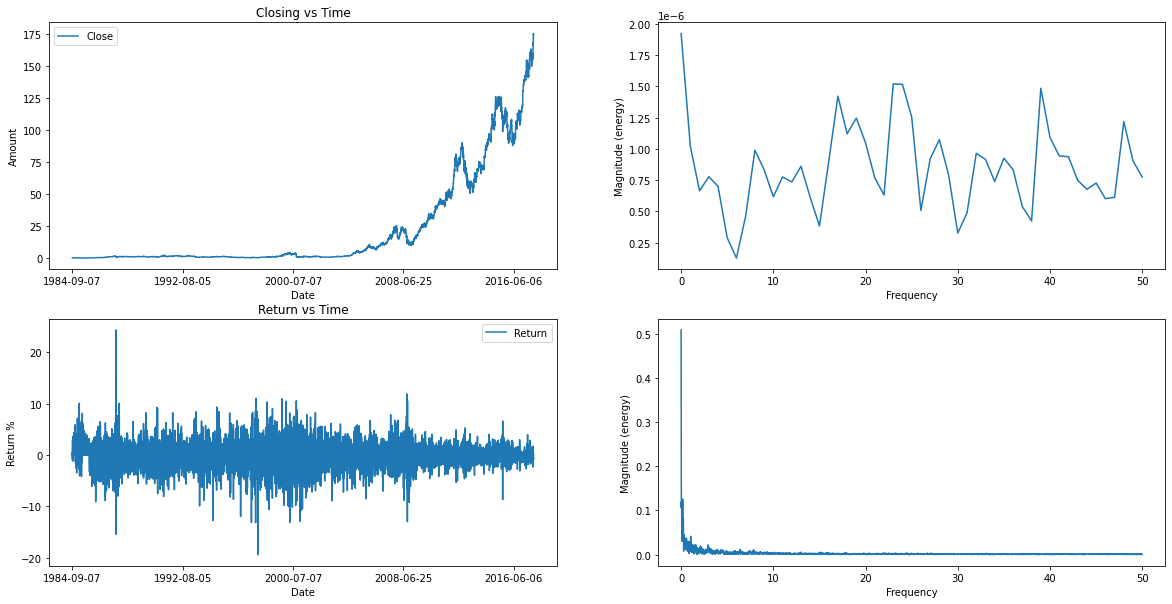

In [173]:
figure, axes = plt.subplots(2, 2,figsize=(20,10))


apple.plot.line('Date', 'Close', title="Closing vs Time", ylabel ='Amount',ax=axes[0,0])

# plt.subplot(2,2,2)
# assigning time values of the signal
signalAmplitude = np.sin(apple.Close)
# plotting the magnitude spectrum of the signal 
pd1 = plt.magnitude_spectrum(signalAmplitude,Fs=100)

apple.plot.line('Date','Return', title="Return vs Time", ylabel='Return %',ax=axes[1,0])

plt.subplot(2,2,2)
signalAmplitude = np.sin(apple.Return)
plt.magnitude_spectrum(signalAmplitude,Fs=100,pad_to=100)

A financial time series is not stationary, therefore, Fourier transformation would not be applicable for this data series. We are able to see this throught the frequency of the 